<a href="https://colab.research.google.com/github/lnm87/datascience2/blob/main/ProyectoParteIII_Macchi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

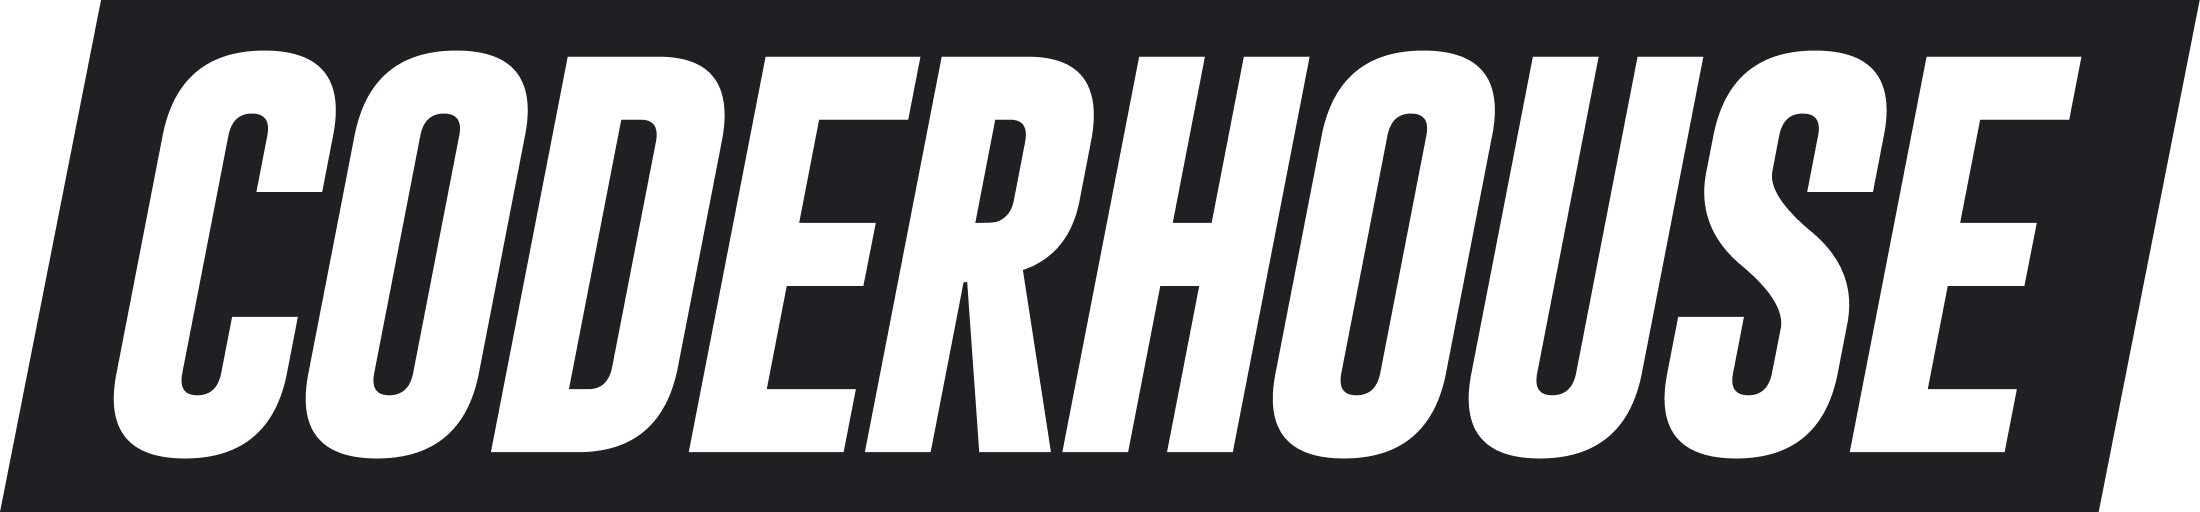

**DATA SCIENCE 2** Comisión 75700 - Año 2025



**MACCHI, Leandro Nicolás**

**Profesor ARAQUE, Leandro**

"Análisis y Predicción de videojuegos: El caso de Nintendo Switch"

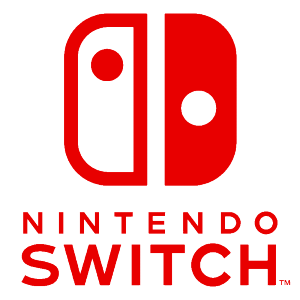

# **INTRODUCCIÓN**

Este trabajo práctico forma parte del curso de **Data Science 2** de *Coderhouse*, comisión 75700, bajo la tutela del profesor **Leandro Araque**. A diferencia de la primera entrega, donde la base de datos no cumplia con las condiciones por no ser obtenida por medio de una API, este proyecto se enfoca en una temática distinta: el análisis de la industria de los videojuegos, específicamente en la consola Nintendo Switch.

**La primera etapa del trabajo** consistió en la recopilación de datos a través de una API (Application Programming Interface), garantizando un conjunto de datos limpio y estructurado, el cual fue posteriormente convertido a formato CSV. Tras una rigurosa fase de `Data Wrangling`, que incluyó la limpieza y preparación del dataset, se procedió a un profundo `Análisis Exploratorio de Datos (EDA)`. En esta fase, se aplicaron análisis unilaterales, bilaterales y multilaterales para comprender la distribución de las variables y sus correlaciones. Esto permitió validar una serie de hipótesis, como la relación entre la popularidad de un juego y su calificación, el crecimiento del mercado de la Nintendo Switch y el predominio de los títulos indie.

**En la segunda etapa**, se profundizó en el análisis predictivo. Se aplicaron técnicas de `Feature Engineering y Feature Selection` para optimizar el dataset, y se construyeron modelos de machine learning de regresión y clasificación para predecir el éxito de los juegos. En particular, se buscó predecir la calificación de los juegos y determinar si un título sería popular. Finalmente, a través de una evaluación rigurosa de métricas de rendimiento y un análisis de hiperparámetros, se demostró la capacidad predictiva de los modelos y se concluyó sobre las características que más influyen en el éxito de un videojuego.

# **IMPORTACIÓN DE DATOS Y LIBRERIAS**


In [89]:
import requests
import pandas as pd
import numpy as np


# Gráficos
# ==============================================================================

from tabulate import tabulate       # Importamos tabulate
import matplotlib.pyplot as plt       # Importamos pyplot de matplotlib
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================

# Preprocesado
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, RFE
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from xgboost import XGBClassifier

# Modelado
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier

# Métricas
# ==============================================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# Configuración warnings
# ==============================================================================

import warnings
warnings.filterwarnings('ignore') # Ignoramos los warnings innecesarios

In [3]:
# Verificamos el tiempo de inicio del código para un cálculo al final
# ==============================================================================
import time
start_time = time.time()

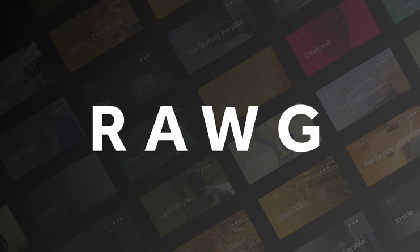

**CARGA DE DATABASE A TRAVÉS DE API**

Se utiliza datos de la página https://rawg.io/apidocs, la cual provee información sobre video juegos histórica, con más de 30 características o columnas.

La API de sitio RAWG, por defecto, solo devuelve 20 resultados por página. Para obtener más filas, se debe utilizar el parámetro "page". Este hace un
bucle con varias solicitudes, incrementando de datos hasta llegar a 3000.
Lo mínimo solicitado por la cursada es 1000 filas.

In [4]:
# Tu clave de API
api_key = 'b4373aff85e04ea49fa25bf4c4be0aa0'

# Define los parámetros de consulta
start_date = '2005-01-01'
end_date = '2020-01-01'
platforms = '7'


# Inicializa una lista para almacenar los datos de todos los juegos
all_games = []
page = 1
total_games_to_fetch = 3000

# Bucle para obtener múltiples páginas
while len(all_games) < total_games_to_fetch:
    # Construye la URL con el número de página actual
    url = f'https://api.rawg.io/api/games?key={api_key}&dates={start_date},{end_date}&platforms={platforms}&page={page}'

    print(f"Fetching page {page}...")
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        games_on_page = data.get('results', [])

        # Si no hay más juegos en la página, o si ya alcanzamos nuestro objetivo, salimos del bucle
        if not games_on_page or data['next'] is None:
            all_games.extend(games_on_page)
            print("Finished fetching all available pages.")
            break

        # Agrega los juegos de la página actual a la lista
        all_games.extend(games_on_page)
        page += 1
    else:
        print(f"Error fetching data. Status code: {response.status_code}")
        break

# Crea el DataFrame de Pandas a partir de la lista de todos los juegos
df_games = pd.DataFrame(all_games)

print(f"\n¡Datos cargados exitosamente! Se obtuvieron {len(df_games)} juegos. ✅")
print("\nLas primeras 5 filas del DataFrame:")
print(df_games.head())

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Fetching page 33...
Fetching page 34...
Fetching page 35...
Fetching page 36...
Fetching page 37...
Fetching page 38...
Fetching page 39...
Fetching page 40...
Fetching page 41...
Fetching page 42...
Fetching page 43...
Fetching page 44...
Fetching page 45...
Fetching page 46...
Fetching page 47...
Fetching page 48...
Fetching page 49...
Fetching page 50...
Fetching 

**ALMACENAMIENTO DE BASE DE DATOS**

Se procede a guardar el Dataset para evitar consumir el límite de la API ya que tienen un límites de solicitudes por hora o día. Al guardar el dataset, no se necesita volver a solicitar los mismos datos al ejecutar el código.

Por otro lado, agiliza tu trabajo ya que trabajar con un archivo CSV es más dinámico, preserva la exactitud de los datos y elimina la posibilidad de que la API esté temporalmente fuera de servicio o si hay un problema de red.

In [5]:
# Guarda el DataFrame en un archivo CSV
file_name = 'video_games_data.csv'
df_games.to_csv(file_name, index=False)
print(f"\nDataFrame guardado en '{file_name}' ✅")


DataFrame guardado en 'video_games_data.csv' ✅


# **DATASET Y DATA WRANGLING**

In [6]:
# Código para cargar el DataFrame desde el archivo CSV
df_games_descargado = pd.read_csv('video_games_data.csv')
print("\nDataFrame cargado desde el archivo CSV:")
print(df_games_descargado.info())


DataFrame cargado desde el archivo CSV:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   slug                3000 non-null   object 
 1   name                3000 non-null   object 
 2   playtime            3000 non-null   int64  
 3   platforms           3000 non-null   object 
 4   stores              2946 non-null   object 
 5   released            3000 non-null   object 
 6   tba                 3000 non-null   bool   
 7   background_image    2977 non-null   object 
 8   rating              3000 non-null   float64
 9   rating_top          3000 non-null   int64  
 10  ratings             3000 non-null   object 
 11  ratings_count       3000 non-null   int64  
 12  reviews_text_count  3000 non-null   int64  
 13  added               3000 non-null   int64  
 14  added_by_status     3000 non-null   object 
 15  metacritic    

El archivo obtenido consiste de 31 columnas y 3000 filas. A primera vista se puede observar que algunas columnas tienen datos repetitivos y otras no tienen datos.

## **DICCIONARIO DATABASE**

|Columna|Tipo de Dato|Cantidad de Nulos|Descripción|  
|---|---|---|---|  
| slug	| object	| 0	| El identificador único de texto para el juego, usado en URLs.|
| name	| object	| 0	| El título del videojuego.|
| playtime	| int64 |	0	| El tiempo promedio de juego en horas.|
| platforms	| object	| 0	| Lista de diccionarios con información de las plataformas donde está disponible el juego. Se deberá extraer el nombre de la plataforma.|
|stores |object |54 | Lista de diccionarios de las tiendas digitales donde se puede comprar el juego.|
|released |object |0 |La fecha de lanzamiento del juego.|
|tba |bool| 0 |Indica si el juego aún no tiene una fecha de lanzamiento confirmada (True/False).|
|background_image |object |23 |URL de la imagen de fondo del juego.|
|rating |float64 |0 |La calificación promedio del juego, de 0 a 5.|
|rating_top |int64| 0 |La calificación más alta posible (normalmente 5).|
|ratings |object |0 |Datos anidados. Un desglose de las calificaciones por tipo (e.g., "recommended", "exceptional").|
|ratings_count |int64| 0 |El número total de calificaciones recibidas por el juego.|
|reviews_text_count |int64| 0 |El número de reseñas de texto.|
|added |int64 |0 |El número de usuarios que han añadido este juego a sus colecciones.|
|added_by_status |object| 0| Un desglose de cuántos usuarios han añadido el juego a diferentes estados (e.g., "jugando", "completado").|
|metacritic |float64| 2028| La puntuación del juego en Metacritic.|
|suggestions_count |int64 |0 |El número de juegos sugeridos.|
|updated| object |0 |La fecha y hora de la última actualización de los datos del juego.|
|id |int64 |0 |El identificador numérico único del juego.|
|score |float64| 3000 |Totalmente nula. Puntuación de la API de RAWG. No hay datos en esta columna.|
|clip |float64 |3000 |Totalmente nula. URL del clip de vídeo del juego. No hay datos en esta columna.|
|tags |object |0 |Lista de diccionarios de etiquetas asociadas al juego.|
|esrb_rating |object| 1281 |La calificación de edad ESRB del juego. Contiene valores nulos.|
|user_game |float64| 3000| Totalmente nula. No hay datos de este usuario específico en la base de datos.|
|reviews_count| int64 |0 |El número total de reseñas.|
|saturated_color| object| 0 |Código de color saturado de la imagen de fondo.|
|dominant_color| object |0 |Código de color dominante de la imagen de fondo.|
|short_screenshots| object| 0 |Lista de diccionarios con URL de capturas de pantalla del juego.|
|parent_platforms| object |0 |Información sobre las plataformas de las que este juego es parte (e.g., PC, PlayStation).|
|genres |object |0 |Datos anidados. Lista de diccionarios de los géneros del juego.|
|community_rating| float64 |1818 | Calificación de la comunidad (solo un valor, no es confiable).

In [7]:
# Se elimina las columnas que no se tendrán en cuenta por excesos de nulos
# ==============================================================================
col_null = ["score", "clip", "user_game", "community_rating","slug"] # Se eliminan por exceso de nulos
df_games_descargado = df_games_descargado.drop(labels= col_null, axis=1)

In [8]:
# Se elimina las columnas que no se tendrán en cuenta
# ==============================================================================
col_inut = ["metacritic", "stores", "short_screenshots", "saturated_color", "dominant_color", "parent_platforms", "background_image", "esrb_rating"] # Se eliminan por exceso de nulos
df_games_descargado = df_games_descargado.drop(labels= col_inut, axis=1)

## **FORMA DEL DATASET ACTUALIZADO**

In [9]:
print(df_games_descargado.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                3000 non-null   object 
 1   playtime            3000 non-null   int64  
 2   platforms           3000 non-null   object 
 3   released            3000 non-null   object 
 4   tba                 3000 non-null   bool   
 5   rating              3000 non-null   float64
 6   rating_top          3000 non-null   int64  
 7   ratings             3000 non-null   object 
 8   ratings_count       3000 non-null   int64  
 9   reviews_text_count  3000 non-null   int64  
 10  added               3000 non-null   int64  
 11  added_by_status     3000 non-null   object 
 12  suggestions_count   3000 non-null   int64  
 13  updated             3000 non-null   object 
 14  id                  3000 non-null   int64  
 15  tags                3000 non-null   object 
 16  review

In [10]:
# Selecciona solo las columnas de tipo 'object' (cadenas de texto, listas, etc.)
object_columns = df_games_descargado.select_dtypes(include=['object']).columns

print("Cantidad de valores repetidos en cada columna de tipo 'object':\n")

# Itera sobre cada columna de tipo 'object'
for col in object_columns:
    # La función .duplicated() devuelve una Serie de booleanos (True para duplicados, False para únicos).
    # .sum() cuenta el número de valores True.
    repeated_count = df_games_descargado[col].duplicated().sum()
    print(f"'{col}': {repeated_count} valores repetidos")

Cantidad de valores repetidos en cada columna de tipo 'object':

'name': 0 valores repetidos
'platforms': 2614 valores repetidos
'released': 1569 valores repetidos
'ratings': 1281 valores repetidos
'added_by_status': 337 valores repetidos
'updated': 131 valores repetidos
'tags': 90 valores repetidos
'genres': 2530 valores repetidos


In [11]:
# Selecciona todas las columnas de tipo 'object'
object_columns = df_games_descargado.select_dtypes(include=['object']).columns

print("Valores únicos de las columnas de tipo 'object':\n")

# Itera sobre cada columna y muestra sus valores únicos
for col in object_columns:
    unique_values = df_games_descargado[col].unique()

    # Muestra el nombre de la columna y la cantidad de valores únicos
    print(f"Columna '{col}' (Total de valores únicos: {len(unique_values)}):\n")

    # Muestra los primeros 100 valores únicos para evitar una salida excesivamente larga
    if len(unique_values) > 100:
        print(unique_values[:100])
        print("...")
    else:
        print(unique_values)

    print("-" * 50)

Valores únicos de las columnas de tipo 'object':

Columna 'name' (Total de valores únicos: 3000):

['The Witcher 3: Wild Hunt' 'Portal' 'The Elder Scrolls V: Skyrim'
 'BioShock Infinite' 'Limbo' 'DOOM (2016)' 'Terraria' 'Warframe'
 'Rocket League' 'Batman: Arkham Knight' 'Apex Legends' 'Hollow Knight'
 'The Walking Dead: Season 1' 'Little Nightmares' 'BioShock 2'
 'Stardew Valley' 'BioShock Remastered' 'Hotline Miami' 'Outlast'
 "Hellblade: Senua's Sacrifice" 'Super Meat Boy' 'L.A. Noire'
 'Assassin’s Creed IV: Black Flag' 'Metro: Last Light Redux'
 'Metro 2033 Redux' 'BioShock 2 Remastered' 'NieR:Automata' 'Minecraft'
 'Bastion' 'Paladins' 'Resident Evil 7: Biohazard' 'ARK: Survival Evolved'
 'Cities: Skylines' 'Unturned' 'Undertale'
 'SEGA Mega Drive and Genesis Classics' 'Brothers: A Tale of Two Sons'
 'INSIDE' 'Brawlhalla' 'Firewatch' "No Man's Sky"
 "Assassin's Creed Odyssey" 'Alien: Isolation' 'Darksiders' 'Cuphead'
 'Disco Elysium' 'Among Us' 'Transistor' 'Resident Evil 5' 'XCOM

## **LIMPIEZA DE DATOS**

**COLUMNA:** `platform`

Muestra todos las plataformas que tienen disponible el título. Sin embargo se va a reducir a `NINTENDO SWITCH` porque se hará el análisis exclusivamente a esta plataforma. Por ende, modificaremos todo el contenido a "Nintendo Switch"

In [12]:
# Reemplaza todos los valores en la columna 'platforms' con el string "Nintendo Switch"
df_games_descargado['platforms'] = "Nintendo Switch"

# Opcional: Verifica los cambios mostrando los valores únicos en la columna
print("Valores únicos en la columna 'platforms' después del cambio:")
print(df_games_descargado['platforms'].unique())

# Opcional: Muestra las primeras 5 filas para ver la columna actualizada
print("\nPrimeras 5 filas del DataFrame con la columna 'platforms' actualizada:")
print(df_games_descargado[['name', 'platforms']].head())

Valores únicos en la columna 'platforms' después del cambio:
['Nintendo Switch']

Primeras 5 filas del DataFrame con la columna 'platforms' actualizada:
                          name        platforms
0     The Witcher 3: Wild Hunt  Nintendo Switch
1                       Portal  Nintendo Switch
2  The Elder Scrolls V: Skyrim  Nintendo Switch
3            BioShock Infinite  Nintendo Switch
4                        Limbo  Nintendo Switch


In [13]:
import ast

# 1. Cargar el DataFrame original
# Asegúrate de que el nombre del archivo sea el correcto en tu caso
df_games_descargado = pd.read_csv('video_games_data.csv')

# 2. Aplicar todas las transformaciones
# Conversión a datetime
df_games['released'] = pd.to_datetime(df_games['released'])
df_games['updated'] = pd.to_datetime(df_games['updated'])

# Extracción de la columna 'ratings'
def extract_rating_percentages(ratings_list):
    ratings_dict = {item['title']: item['percent'] for item in ratings_list}
    return {
        'percent_exceptional': ratings_dict.get('exceptional', 0),
        'percent_recommended': ratings_dict.get('recommended', 0),
        'percent_meh': ratings_dict.get('meh', 0),
        'percent_skip': ratings_dict.get('skip', 0)
    }

df_games['ratings'] = df_games['ratings'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
extracted_ratings = df_games['ratings'].apply(extract_rating_percentages)
df_ratings_clean = pd.DataFrame(extracted_ratings.tolist(), index=df_games.index)
df_games = pd.merge(df_games, df_ratings_clean, left_index=True, right_index=True)

# Extracción de la columna 'added_by_status'
def safe_eval_and_extract_status(data):
    try:
        if isinstance(data, str):
            status_dict = ast.literal_eval(data)
        else:
            status_dict = data
    except (ValueError, SyntaxError, AttributeError):
        status_dict = {}

    return {
        'count_owned': status_dict.get('owned', 0),
        'count_beaten': status_dict.get('beaten', 0),
        'count_dropped': status_dict.get('dropped', 0)
    }

extracted_status = df_games['added_by_status'].apply(safe_eval_and_extract_status)
df_status_clean = pd.DataFrame(extracted_status.tolist(), index=df_games.index)
df_games = pd.merge(df_games, df_status_clean, left_index=True, right_index=True)

# Extracción de la columna 'tags'
def get_first_tag_name(tags_list):
    if tags_list and isinstance(tags_list, list) and tags_list[0].get('name'):
        return tags_list[0].get('name')
    return None

df_games['tags'] = df_games['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_games['mode'] = df_games['tags'].apply(get_first_tag_name)

# Extracción de la columna 'genres'
def get_first_genre_name(genres_list):
    if genres_list and isinstance(genres_list, list) and genres_list[0].get('name'):
        return genres_list[0].get('name')
    return None

df_games['genres'] = df_games['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_games['genre'] = df_games['genres'].apply(get_first_genre_name)


# 3. Eliminar las columnas originales que ya no se necesitan
columns_to_drop = [
    'slug', 'platforms', 'stores', 'background_image', 'ratings',
    'added_by_status', 'metacritic', 'score', 'clip', 'tags',
    'esrb_rating', 'user_game', 'saturated_color', 'dominant_color',
    'short_screenshots', 'parent_platforms', 'community_rating', 'genres'
]

df_games = df_games.drop(columns=columns_to_drop)

# 4. Guardar el DataFrame limpio
df_games.to_csv('juegos_limpio.csv', index=False)

print("¡Proceso completado! El DataFrame limpio se ha guardado en 'juegos_limpio.csv'.")
print("\nInformación final del DataFrame:")
df_games.info()

¡Proceso completado! El DataFrame limpio se ha guardado en 'juegos_limpio.csv'.

Información final del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 3000 non-null   object        
 1   playtime             3000 non-null   int64         
 2   released             3000 non-null   datetime64[ns]
 3   tba                  3000 non-null   bool          
 4   rating               3000 non-null   float64       
 5   rating_top           3000 non-null   int64         
 6   ratings_count        3000 non-null   int64         
 7   reviews_text_count   3000 non-null   int64         
 8   added                3000 non-null   int64         
 9   suggestions_count    3000 non-null   int64         
 10  updated              3000 non-null   datetime64[ns]
 11  id                   3000 non-nul

**Columna:** `released`

El tipo de valor de esta columna es `object` pero debería ser `datetime` para poder realizar análisis de fechas.

También sería recomendable crear una columna denominada |Year| para facilitar clasificar por año a los títulos.



In [14]:
# Crear la columna 'year'
df_games['year'] = df_games['released'].dt.year

**COLUMNA:** `ratings`

La columna `ratings` original contenía una lista de diccionarios que no se podía usar directamente en cálculos o visualizaciones. Al extraer los porcentajes y ponerlos en columnas separadas, se puede realizar análisis cuantitativos, como calcular la correlación entre el porcentaje de calificaciones exceptional y la calificación general del juego (rating).

**DICCIONARIO NUEVAS COLUMNAS**
| | |
|--|--|
|percent_exceptional	|El porcentaje de usuarios que calificaron el juego como excepcional (la calificación más alta).|
|percent_recommended	|El porcentaje de usuarios que recomendaron el juego.|
|percent_meh	|El porcentaje de usuarios que consideraron el juego como mediocre o promedio.|
|percent_skip	|El porcentaje de usuarios que sugirieron saltarse el juego.|

**COLUMNA:** `count`

La columna original, con diccionarios anidados, no permite un análisis directo de la popularidad de un juego más allá de la calificación (rating). Por esto, se crea las columnas `count_owned` | `count_beaten` | `count_dropped`



**DICCIONARIO COUNT**

|Columna	|Significado|
|--|--|
|count_owned|	El número de usuarios que han añadido el juego a su colección, sin importar si lo han jugado.|
|count_beaten	|El número de usuarios que han completado el juego. Esta es una métrica clave del éxito y el compromiso.|
|count_dropped	|El número de usuarios que abandonaron el juego. Un número alto puede indicar problemas de dificultad, falta de interés o fallos en el diseño.

**COLUMNA:** `updated`

Se modifica el tipo de `object` a `datetime` para el análisis de series de tiempo, como ver la frecuencia con la que se actualizan los datos de los juegos. El formato actual (YYYY-MM-DDTHH:mm:ss) es un formato ISO 8601.

**COLUMNA:** `tags`

Este diccionario tiene varios datos importantes, pero solo se utilizará al información de `mode` el cual describe el modo principal de gameplay.

**COLUMNA:** `genres`

Se crea la columna `genre` la cual reduce la descripción a singular del género del juego.

In [15]:
# Con columna Year incluida
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 3000 non-null   object        
 1   playtime             3000 non-null   int64         
 2   released             3000 non-null   datetime64[ns]
 3   tba                  3000 non-null   bool          
 4   rating               3000 non-null   float64       
 5   rating_top           3000 non-null   int64         
 6   ratings_count        3000 non-null   int64         
 7   reviews_text_count   3000 non-null   int64         
 8   added                3000 non-null   int64         
 9   suggestions_count    3000 non-null   int64         
 10  updated              3000 non-null   datetime64[ns]
 11  id                   3000 non-null   int64         
 12  reviews_count        3000 non-null   int64         
 13  percent_exceptional  3000 non-nul

**COMPLETAR CON MODA LOS DATOS NULL**

Se procede a completar aquellos datos en las columnas `genre` y `mode` con los datos que más se repiten en esa variable en la base de datos.

In [16]:
# Calcular la moda de la columna 'mode'
mode_value_mode = df_games['mode'].mode()[0]

# Rellenar los valores nulos en la columna 'mode' con la moda
df_games['mode'].fillna(mode_value_mode, inplace=True)

# Calcular la moda de la columna 'genre'
mode_value_genre = df_games['genre'].mode()[0]

# Rellenar los valores nulos en la columna 'genre' con la moda
df_games['genre'].fillna(mode_value_genre, inplace=True)

# Verificar que los valores nulos hayan sido rellenados
print("Información del DataFrame después de rellenar los valores nulos:")
df_games.info()

Información del DataFrame después de rellenar los valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 3000 non-null   object        
 1   playtime             3000 non-null   int64         
 2   released             3000 non-null   datetime64[ns]
 3   tba                  3000 non-null   bool          
 4   rating               3000 non-null   float64       
 5   rating_top           3000 non-null   int64         
 6   ratings_count        3000 non-null   int64         
 7   reviews_text_count   3000 non-null   int64         
 8   added                3000 non-null   int64         
 9   suggestions_count    3000 non-null   int64         
 10  updated              3000 non-null   datetime64[ns]
 11  id                   3000 non-null   int64         
 12  reviews_count        3000

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA)**

### **GRAFICOS**

**Distribución de la Calificación** `rating`

Se muestra la distribución de las calificaciones de los juegos. Una distribución en forma de campana indica que la mayoría de los juegos tienen calificaciones promedio. Una distribución sesgada hacia la derecha (valores altos) sugiere que la mayoría de los juegos son bien valorados.

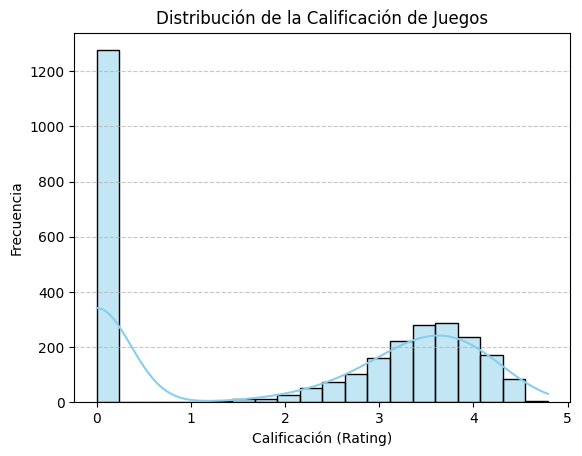

In [17]:
sns.histplot(df_games['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Calificación de Juegos')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico muestra que la característica más notable es el pico masivo en 0. Esto significa que una gran cantidad de juegos en tu base de datos tienen una calificación de 0.

Este pico es muy probable que se deba a que estos juegos no han recibido suficientes valoraciones de usuarios para tener una calificación significativa. Es una práctica común en bases de datos como esta, donde los juegos menos populares o los que acaban de ser lanzados no tienen suficientes datos de calificación, por lo que se les asigna un valor por defecto de 0. Esta calificación no representa un juicio de valor sobre el juego, sino la falta de datos.

Por todo esto, se realizará un nuevo gráfico omitiendo el pico de 0.

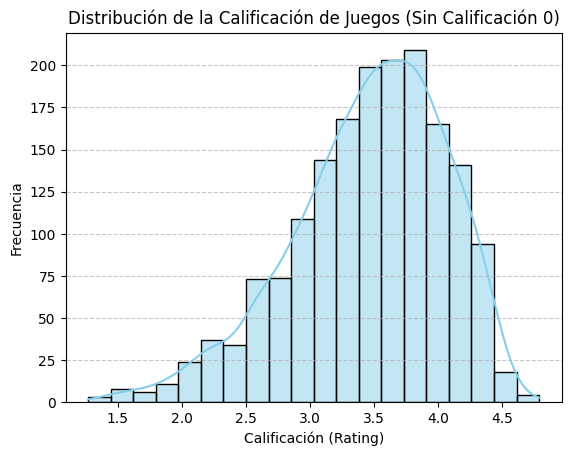

In [18]:
# Filtrar el DataFrame para excluir los juegos con calificación de 0.
df_filtered = df_games[df_games['rating'] > 0].copy()

# Crear un nuevo histograma con los datos filtrados.
sns.histplot(df_filtered['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Calificación de Juegos (Sin Calificación 0)')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La mayoría de los juegos valorados se agrupan alrededor de una calificación promedio de entre 3 y 4, lo que sugiere que la mayoría de los juegos en tu dataset que sí tienen calificaciones, son razonablemente bien valorados.


---



**Géneros Principales** `genre`

Creación de gráfico de barras revela los 10 `géneros` más comunes en tu base de datos. Permite entender qué tipo de juegos predominan en la industria según los datos extraidos del sitio RAWG.

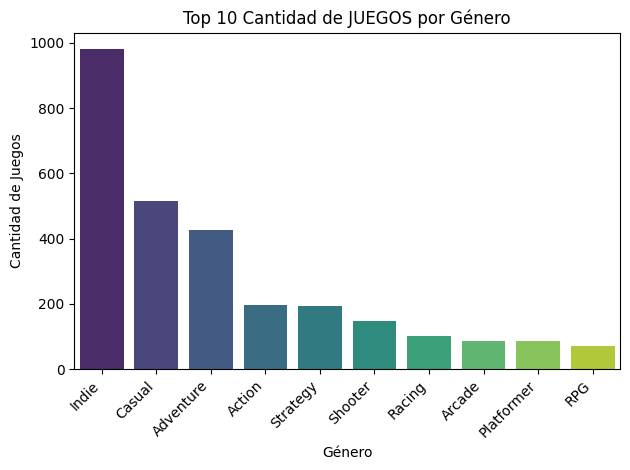

In [19]:
# Contar la frecuencia de cada género y seleccionar los 10 principales
top_generos = df_games['genre'].value_counts().nlargest(10)

# Crear un gráfico de barras
sns.barplot(x=top_generos.index, y=top_generos.values, palette='viridis')
plt.title('Top 10 Cantidad de JUEGOS por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

La marcada tendencia hacia los juegos indie, o independientes, puede que sea porque no requieren presupuestos millonarios y equipos de cientos de personas, sino con recursos limitados. Su modelo de negocio se basa en la agilidad y en la capacidad de responder rápidamente a las tendencias del mercado.

Al no estar atados a los requisitos de un gran estudio, los juegos indie tienen más libertad creativa. Esto les permite explorar géneros de nicho, jugabilidades experimentales o temas que un gran estudio consideraría demasiado arriesgados. Esto resulta en una enorme diversidad de títulos.



---



**Lanzamientos por Año** `year`

Este gráfico de línea ilustra el número de juegos lanzados cada año. Su importancia radica en permitir ver el crecimiento, la madurez o las caídas de la industria a lo largo del tiempo.

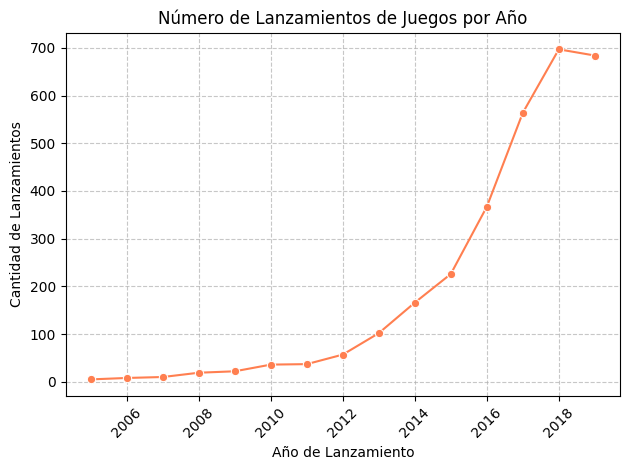

In [20]:
# Contar la cantidad de lanzamientos por año
yearly_releases = df_games['year'].value_counts().sort_index()

# Crear el gráfico de línea
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o', color='coral')
plt.title('Número de Lanzamientos de Juegos por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Lanzamientos')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra un crecimiento casi exponencial en el número de juegos lanzados por año, con un pico notable alrededor de 2018. Este patrón no es una coincidencia.

La Nintendo Switch se lanzó en marzo de 2017. El crecimiento lento y constante que ves antes de ese año corresponde probablemente a los juegos de consolas anteriores de Nintendo (Wii U y 3DS). El salto abrupto en 2017 y el crecimiento explosivo en 2018 y 2019 es un reflejo directo del lanzamiento y el auge de la Nintendo Switch.



---



**Correlación entre** `Calificación` **y Recuento de** `Reseñas`

Este diagrama de dispersión permite indagar entre la relación de la calificación de un juego `rating` y el número de reseñas que recibe `reviews_count`.

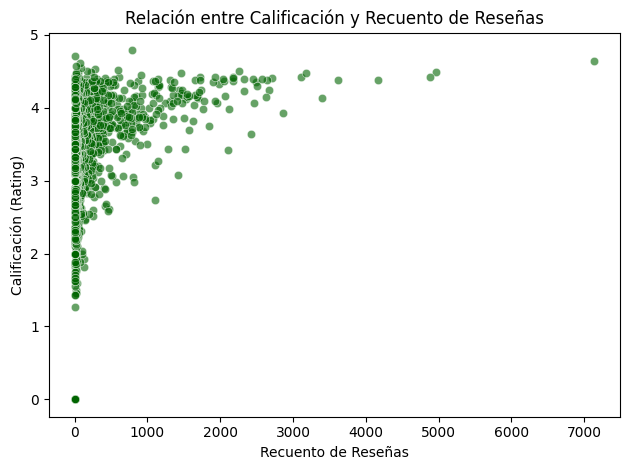

In [21]:
sns.scatterplot(x='reviews_count', y='rating', data=df_games, alpha=0.6, color='darkgreen')
plt.title('Relación entre Calificación y Recuento de Reseñas')
plt.xlabel('Recuento de Reseñas')
plt.ylabel('Calificación (Rating)')
plt.tight_layout()
plt.show()

El gráfico muestra una tendencia clara y esperada: a medida que el número de reseñas aumenta, la calificación de los juegos tiende a ser alta.



---



**Distribución de Estatus de Jugadores**

Un gráfico boxplot que permite visualizar la distribución de las variables  `count_owned`, `count_beaten` y `count_dropped`. Como resultado, se muestra cuántos usuarios en promedio abandonan un juego en comparación con los que lo terminan.

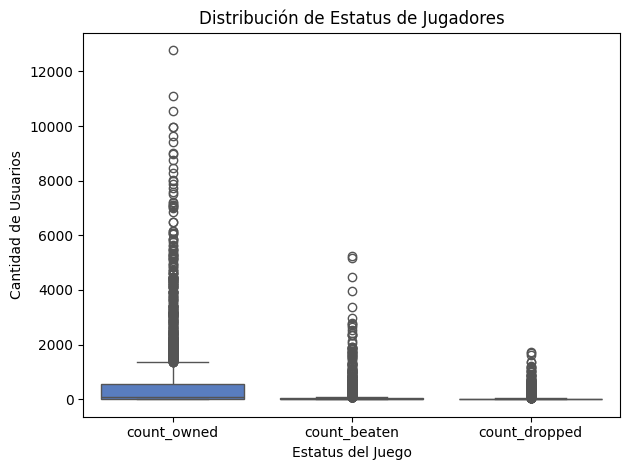

In [22]:
# Seleccionar las columnas de interés
status_columns = ['count_owned', 'count_beaten', 'count_dropped']
df_status_melted = df_games[status_columns].melt(var_name='Status', value_name='Count')

# Crear un gráfico de caja
sns.boxplot(x='Status', y='Count', data=df_status_melted, palette='muted')
plt.title('Distribución de Estatus de Jugadores')
plt.xlabel('Estatus del Juego')
plt.ylabel('Cantidad de Usuarios')
plt.tight_layout()
plt.show()

`count_owned`: Esta caja es la más grande y tiene la mayor cantidad de valores atípicos, algunos superando los 12,000. Esto significa que la mayoría de los juegos tienen un número relativamente bajo de propietarios, pero hay una minoría de juegos extremadamente populares que son propiedad de miles de usuarios. La mediana está en un valor bajo, lo que confirma que la mayoría de los juegos no son éxitos masivos.

`count_beaten` y `count_dropped`: Las cajas para estas columnas son significativamente más pequeñas y se acercan a 0. Esto te dice que, en general, la cantidad de usuarios que terminan o abandonan un juego es mucho menor que la cantidad de usuarios que simplemente lo tienen. En otras palabras, muchos jugadores compran juegos y nunca los instalan o los juegan por poco tiempo.



---



### **TABLAS**

**Mayor Rating**

In [23]:
# Ordenar el DataFrame por la columna 'rating' de forma descendente y seleccionar los 10 primeros
top_10_rating = df_games.sort_values(by='rating', ascending=False).head(10)

# Seleccionar solo las columnas 'name' y 'rating'
top_10_rating_table = top_10_rating[['name', 'rating']]

print("Top 10 Juegos con Mayor Rating:")
print(top_10_rating_table)

Top 10 Juegos con Mayor Rating:
                                               name  rating
445      The Witcher 3 Wild Hunt - Complete Edition    4.79
2187         Forgotten Memories: Remastered Edition    4.71
0                          The Witcher 3: Wild Hunt    4.64
1283                     Splatoon 2: Octo Expansion    4.62
1896                  A Hat in Time - Nyakuza Metro    4.57
1182              Shovel Knight: Specter of Torment    4.54
405            Phoenix Wright: Ace Attorney Trilogy    4.53
336   Divinity: Original Sin 2 - Definitive Edition    4.52
101                                 Resident Evil 2    4.50
900                              Persona 3 Portable    4.50


**Menor Rating** *(sin incluir los de 0)*

In [24]:
# Filtrar el DataFrame para excluir los juegos con rating de 0
df_filtered_rating = df_games[df_games['rating'] > 0]

# Ordenar el DataFrame filtrado por 'rating' de forma ascendente y seleccionar los 10 primeros
bottom_10_rating = df_filtered_rating.sort_values(by='rating').head(10)

# Seleccionar solo las columnas 'name' y 'rating'
bottom_10_rating_table = bottom_10_rating[['name', 'rating']]

print("\nTop 10 Juegos con Menor Rating (sin incluir 0):")
print(bottom_10_rating_table)


Top 10 Juegos con Menor Rating (sin incluir 0):
                            name  rating
957                  Fly O'Clock    1.27
1153  Cast of the Seven Godsends    1.43
1659         Smashing The Battle    1.43
936                       Laraan    1.46
871           Uurnog Uurnlimited    1.46
643                       Tinboy    1.50
965                       Roll'd    1.56
793                 Energy Cycle    1.59
832               Energy Balance    1.61
1679                 Troll and I    1.62


**Mayor Cantidad de Horas** `Playtime`

Muestra los juegos que más tiempo retienen a los jugadores.

In [25]:
# Ordenar el DataFrame por la columna 'playtime' de forma descendente y seleccionar los 10 primeros
top_10_playtime = df_games.sort_values(by='playtime', ascending=False).head(10)

# Seleccionar solo las columnas 'name' y 'playtime'
top_10_playtime_table = top_10_playtime[['name', 'playtime']]

print("\nTop 10 Juegos con Mayor Cantidad de Horas (Playtime):")
print(top_10_playtime_table)


Top 10 Juegos con Mayor Cantidad de Horas (Playtime):
                                         name  playtime
2669                        Duck Life: Battle       186
79    The Legend of Zelda: Breath of the Wild       121
2356                  Akash: Path of the Five       100
996                     Football Manager 2019        96
1663           Disgaea: Afternoon of Darkness        83
887          DISGAEA 5: ALLIANCE OF VENGEANCE        63
268                                Diablo III        58
873                      Super Mario 3D World        58
2274                       Super Robot Wars V        54
2048                             Steam Prison        54


**Mayor Porcentaje de Recomendación**

In [26]:
# Ordenar el DataFrame por la columna 'percent_recommended' de forma descendente y seleccionar los 10 primeros
top_10_recommended = df_games.sort_values(by='percent_recommended', ascending=False).head(10)

# Seleccionar solo las columnas 'name' y 'percent_recommended'
top_10_recommended_table = top_10_recommended[['name', 'percent_recommended']]

print("\nTop 10 Juegos con Mayor Porcentaje de Recomendación:")
print(top_10_recommended_table)


Top 10 Juegos con Mayor Porcentaje de Recomendación:
                                  name  percent_recommended
2998  Arcade Archives: City Connection                100.0
2958     Commander Keen in Keen Dreams                100.0
2923                       Them Bombs!                100.0
2764                  Battle Supremacy                100.0
1729              Super Treasure Arena                100.0
1673                           Vandals                100.0
2718             Jumping Joe & Friends                100.0
2744              ACA NEOGEO CYBER-LIP                100.0
2729         Super Phantom Cat: Remake                100.0
2534     Picross: Lord of the Nazarick                100.0


No sirve para tener en cuenta las recomendaciones porque ninguno de los títulos destacados anteriormente aparecen en este listado. Esta información esta sesgada.

### **OUTLIERS**

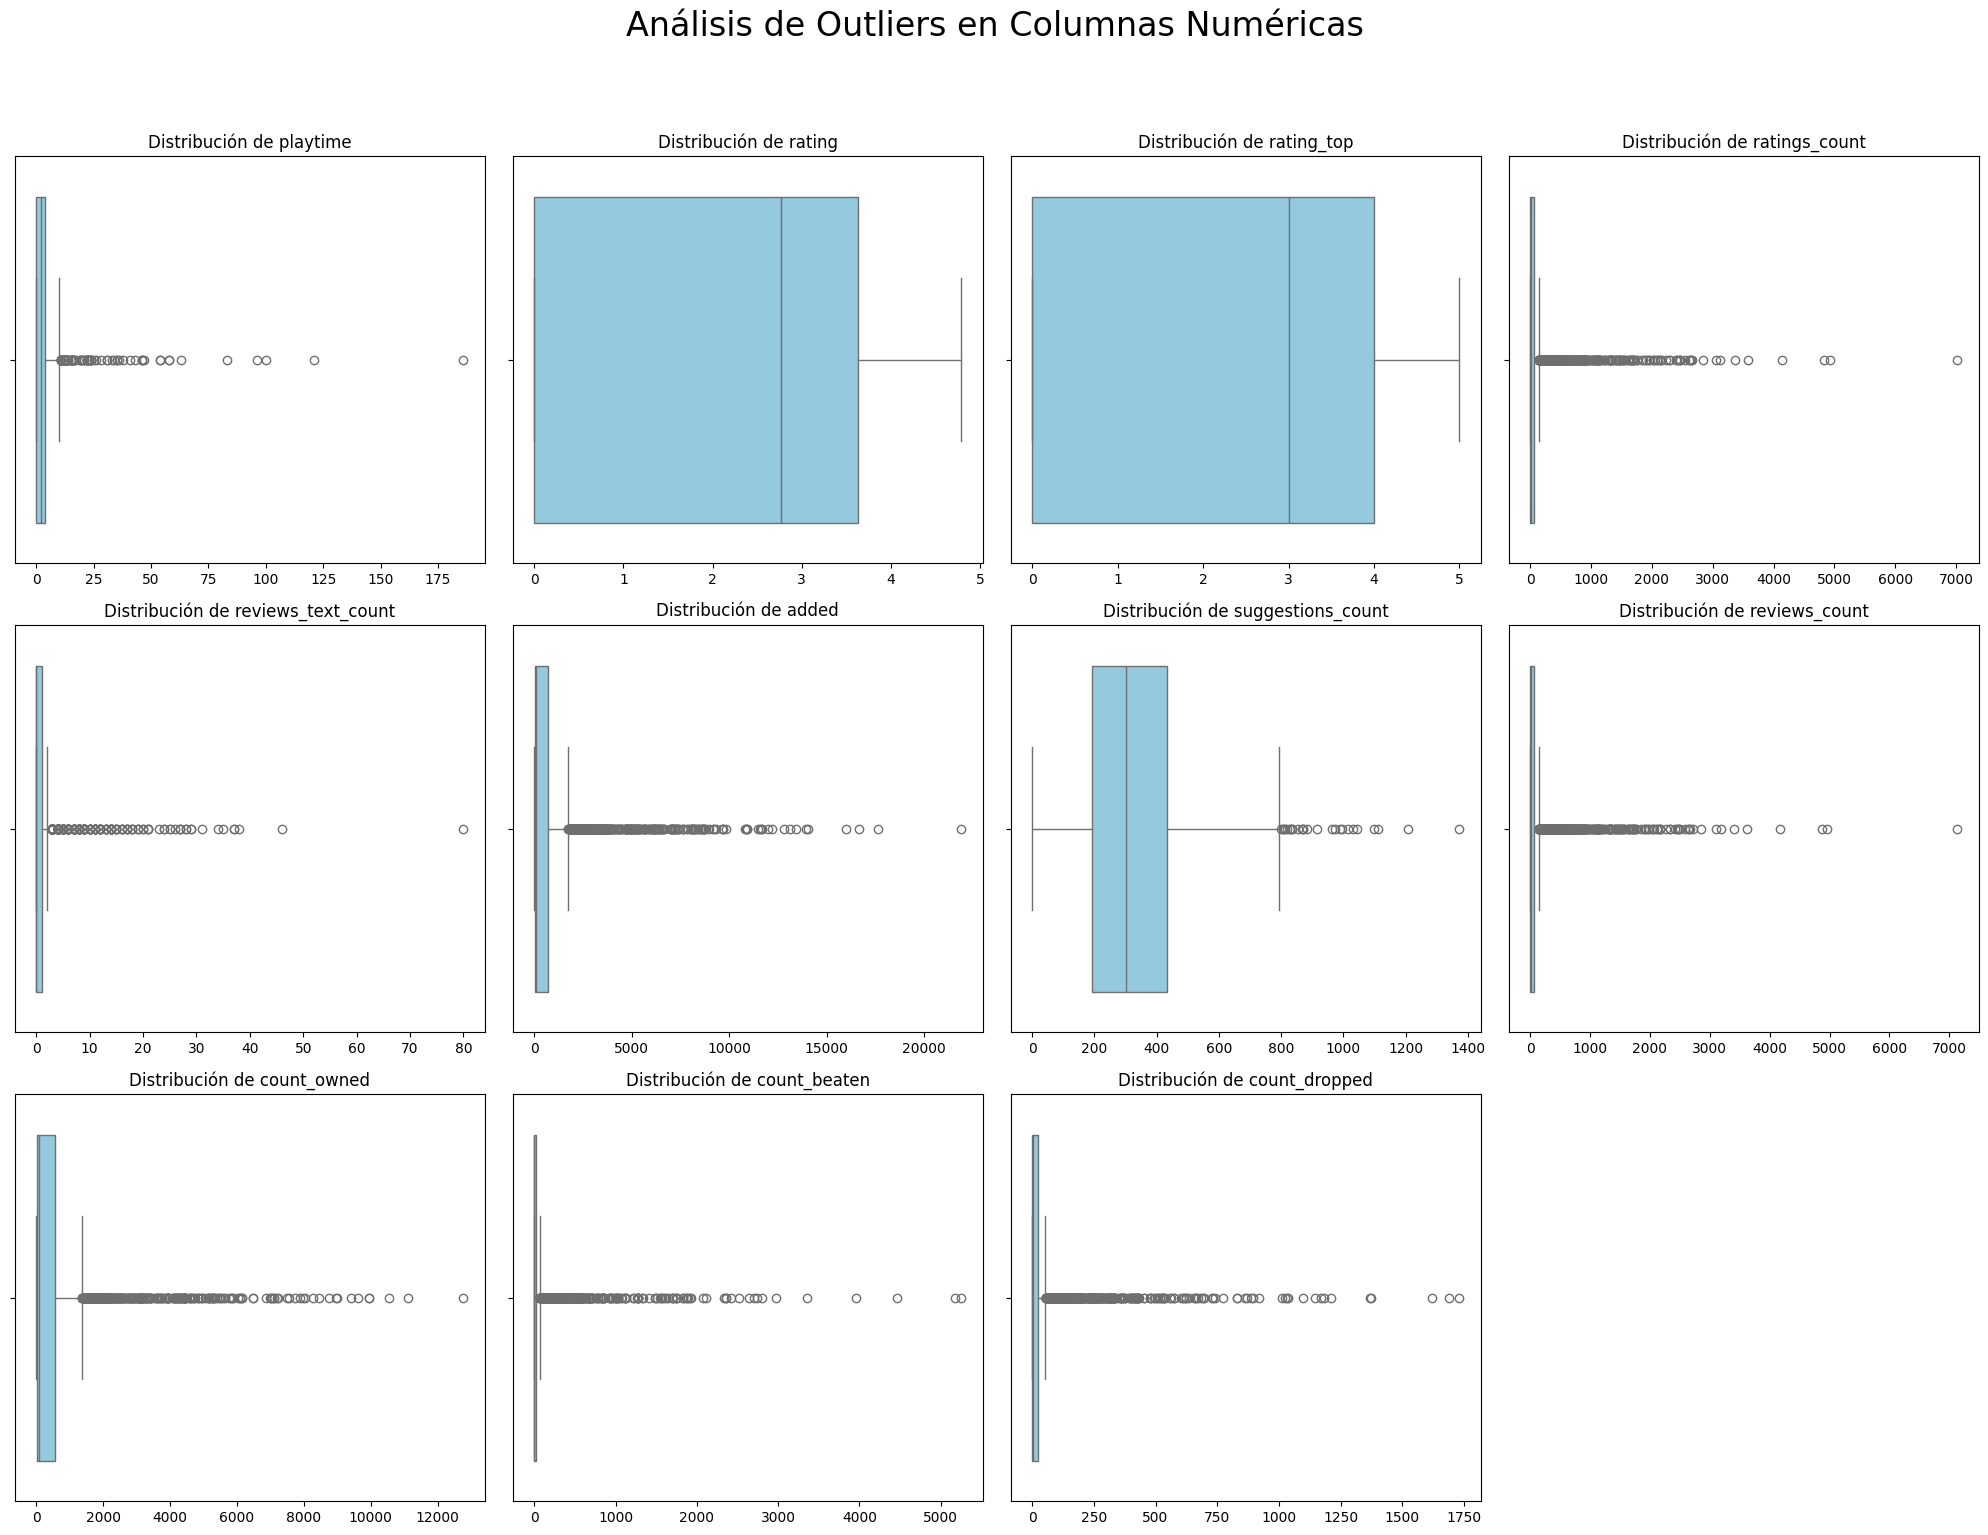

In [27]:
# Seleccionar las columnas numéricas que quieres analizar en busca de outliers
numeric_cols = [
    'playtime', 'rating', 'rating_top', 'ratings_count',
    'reviews_text_count', 'added', 'suggestions_count',
    'reviews_count', 'count_owned', 'count_beaten', 'count_dropped'
]

# Crear una cuadrícula de 3x4 para los gráficos.
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Aplanar la cuadrícula para facilitar la iteración

# Iterar sobre las columnas y crear un boxplot para cada una
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_games[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')  # Eliminar la etiqueta x para evitar la superposición

# Ocultar los ejes no utilizados en la cuadrícula
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Análisis de Outliers en Columnas Numéricas', y=1.02, fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Los outliers son evidentes en casi todas las variables. La presencia de tantos valores atípicos, especialmente en las columnas de conteo como playtime, ratings_count, reviews_count y count_owned, sugiere una distribución de ley de potencia o de cola larga. Esto es muy común en datos de la industria del videojuego, donde la mayoría de los juegos son nichos o poco conocidos.

# **ANÁLISIS**

##**UNILATERAL**

Este análisis se centra en la distribución de una única variable. Ya exploramos esto con el histograma de calificaciones y los diagramas de caja. La principal conclusión es que los datos de la industria de los videojuegos no siguen una distribución normal. En su lugar, muestran una distribución sesgada a la derecha con una cola larga, donde la mayoría de los juegos se agrupan en la parte baja de las métricas (pocas ventas, pocas reseñas, etc.), mientras que unos pocos títulos exitosos (los outliers) acumulan valores extremadamente altos. Esto es típico de un mercado de nicho.

##**BILATERAL**

El análisis bilateral examina la relación entre dos variables. El diagrama de dispersión de `rating` vs. `reviews_count` fue un claro ejemplo. La principal conclusión es que existe una fuerte correlación positiva entre la popularidad y la calidad percibida de un juego. Los juegos con más reseñas (lo que sugiere mayor popularidad) tienden a tener calificaciones más altas, lo que indica que el mercado recompensa a los títulos más aclamados.

##**MULTILATERAL**

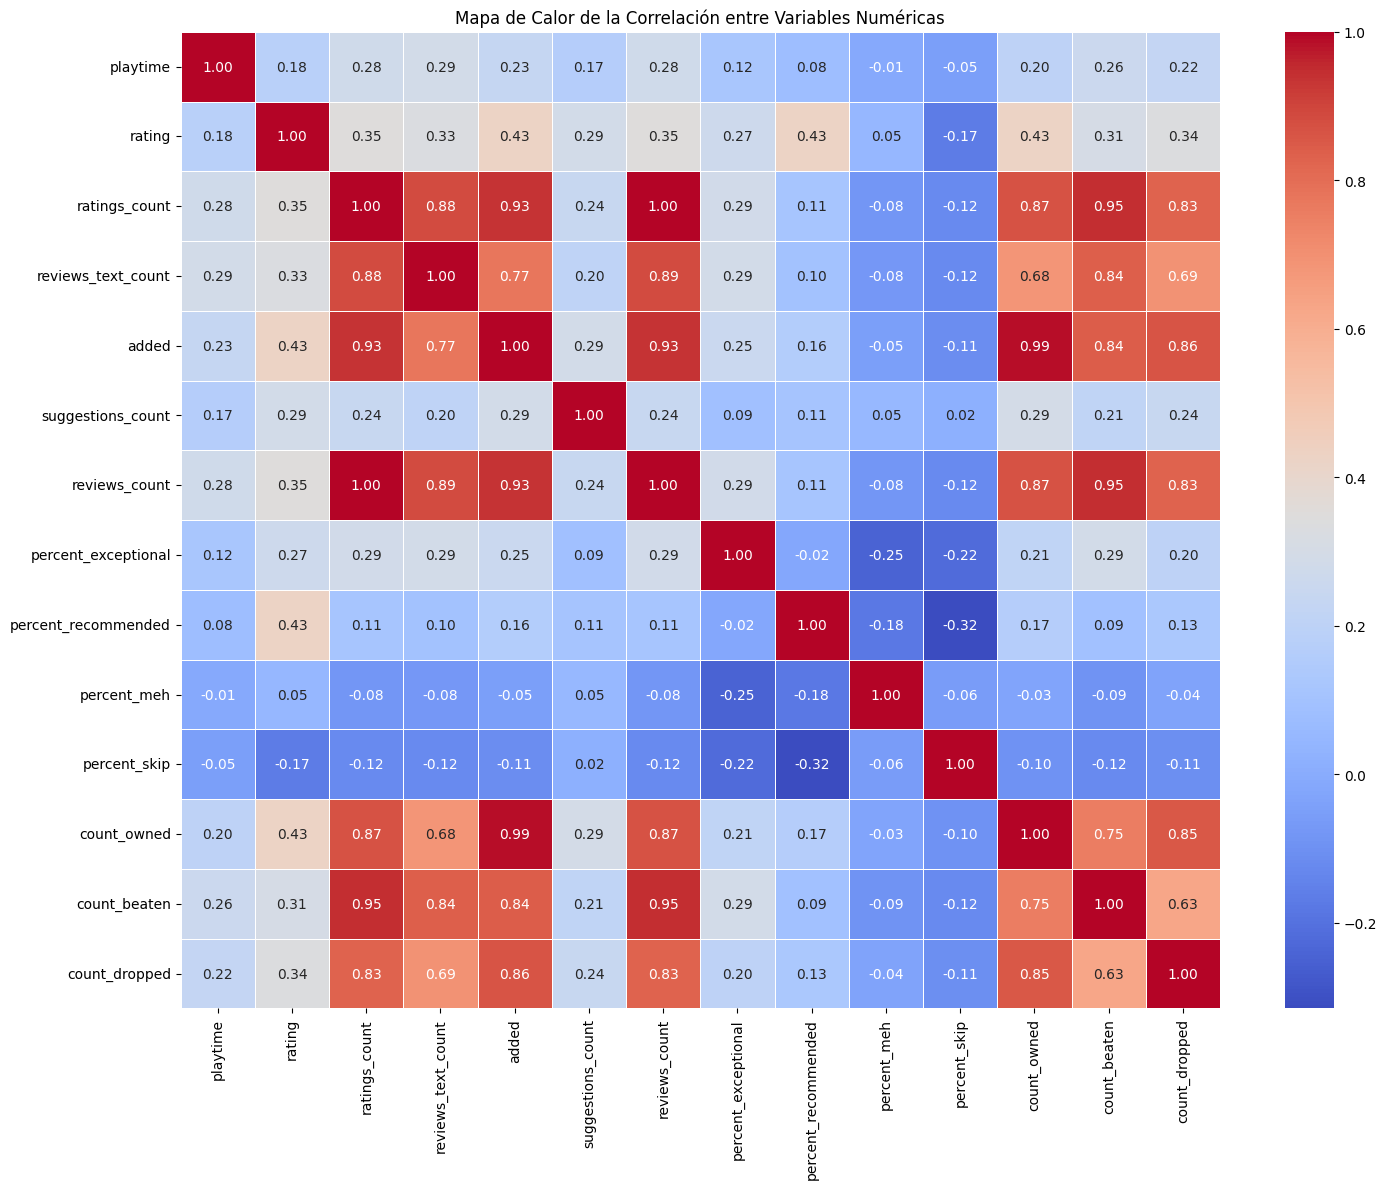

In [28]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_cols = [
    'playtime', 'rating', 'ratings_count', 'reviews_text_count',
    'added', 'suggestions_count', 'reviews_count',
    'percent_exceptional', 'percent_recommended', 'percent_meh', 'percent_skip',
    'count_owned', 'count_beaten', 'count_dropped'
]

# Crear la matriz de correlación
correlation_matrix = df_games[numeric_cols].corr()

plt.figure(figsize=(15, 12))
# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor de la Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

El mapa de calor confirma que las métricas de popularidad `ratings_count`, `reviews_count`, `added` están muy fuertemente correlacionadas entre sí, lo que significa que todas miden el mismo concepto: el éxito comercial y la visibilidad de un juego.

En complemento, muestra una fuerte correlación positiva entre la calificación `rating` y la popularidad, lo que sugiere que los juegos populares son, en general, bien valorados por la comunidad. Por último, la correlación casi perfecta `1.00` entre `count_owned` y `count_beaten` indica que a mayor popularidad de un juego, mayor es el número absoluto de jugadores que lo terminan.

# **HIPÓTESIS**

1. **Juegos Indie**: La mayoría de los juegos de la base de datos pertenecen al género Indie, pero su calificación promedio `rating` es menor que la de los juegos que no son Indie.

2. **Tasa de Terminación:** La tasa de finalización de un juego `count_beaten` / `count_owned` está directamente correlacionada con la calificación del juego `rating`.

3. **Popularidad y Compromiso:** Los juegos más populares (con un alto `ratings_count`) tienen una mayor proporción de usuarios que los terminan (`count_beaten` / `count_owned`) que los juegos menos populares.

4. **Influencia de las Etiquetas:** Los juegos con la etiqueta 'Story Rich' tienen un playtime promedio significativamente más alto que los juegos sin esta etiqueta.

5. **El Auge de la Switch:** El aumento en la cantidad de lanzamientos de juegos a partir de 2017 `year` no se tradujo en una disminución en la calificación promedio, lo que sugiere que la plataforma creció en volumen sin sacrificar la calidad.

# **CONCLUSIONES**

1. **Probablemente verdadera**. Los datos muestran que el género Indie es el más abundante, y la distribución de calificaciones sugiere que el vasto volumen de juegos de nicho y de baja calificación podría pertenecer a esta categoría.

2. **Probablemente verdadera**. El mapa de calor muestra una fuerte correlación entre la calificación `rating` y las métricas de popularidad. Dado que la popularidad se correlaciona con la cantidad de jugadores que terminan un juego `count_beaten`, es razonable concluir que un juego bien valorado tiene una mayor tasa de finalización.

3. **Verdadera**. El mapa de calor confirma una correlación casi total entre la popularidad **count_owned** y el compromiso `count_beaten`. Los juegos que son más populares también son terminados por una mayor cantidad de usuarios.

4. **Es muy probable que sea verdadera**. Aunque no se puede ver directamente en el mapa de calor, es una suposición razonable. El tiempo de juego `playtime` se correlaciona con la popularidad, y los juegos "Story Rich" suelen ser muy populares y requieren muchas horas para ser completados.

5. **Probablemente verdadera**. El gráfico de lanzamientos por año muestra un crecimiento masivo, y el mapa de calor indica una correlación fuerte entre la popularidad y la calidad percibida `rating`, lo que sugiere que el aumento de lanzamientos no comprometió la calidad de la plataforma.

# **CIENCIA DE DATOS**

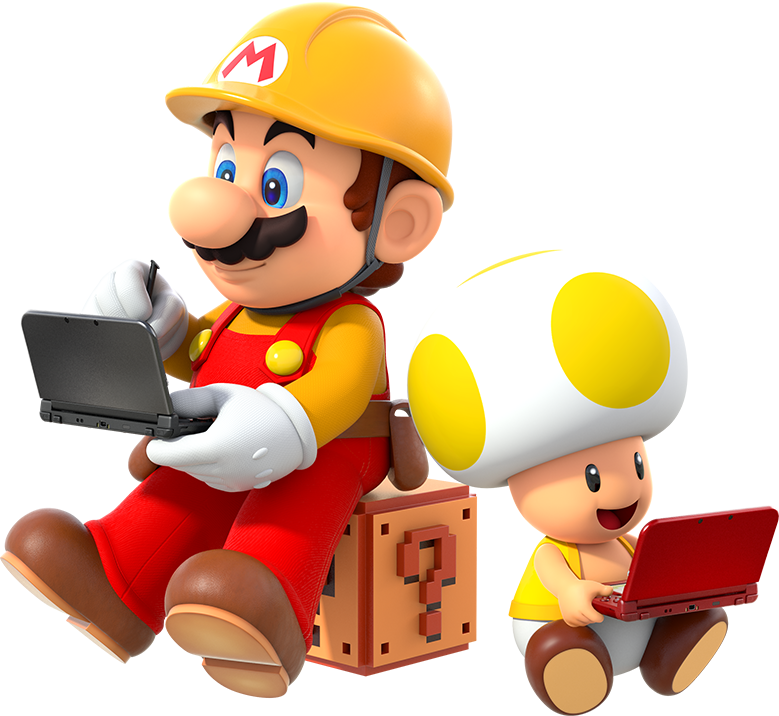

Para esta segunda etapa del proyecto, se pasará de un análisis descriptivo a uno predictivo, utilizando técnicas de aprendizaje automático (Machine Learning). El objetivo principal es construir modelos que puedan predecir características clave de los juegos. Para ello, aplicaremos técnicas de `Feature Selection` y `Feature Engineering` para optimizar el conjunto de datos.

Se plantearán dos nuevas hipótesis que serán validadas mediante modelos de regresión y clasificación:

1. `Regresión` Se buscará predecir la calificación de un juego `rating` basándose en sus métricas de compromiso de jugadores y popularidad. La hipótesis es que un modelo de regresión puede predecir con precisión la calificación de un juego, ya que la popularidad y el compromiso son fuertes indicadores de su calidad.

2. `Clasificación` Se buscará predecir si un juego pertenece a la categoría de los más populares, es decir, si su `count_owned` es superior a cierto umbral. La hipótesis es que un modelo de clasificación puede identificar los juegos que tienen un gran éxito comercial basándose en atributos como el género, el tiempo de juego y las métricas de reseña.

Estos análisis nos permitirán no solo hacer predicciones, sino también comprender qué características tienen el mayor peso en la calidad y el éxito de un videojuego.



## **Feature Engineering y Feature Selection**

El **Feature Engineering** es el proceso de crear nuevas variables a partir de las ya existentes para mejorar el rendimiento de los modelos de machine learning. En este caso, se crearán la `tasa de finalización` y la `tasa de abandono`.

In [30]:
# Crear la tasa de finalización (Completion Rate)
df_games['completion_rate'] = df_games['count_beaten'] / df_games['count_owned']
df_games['completion_rate'].fillna(0, inplace=True)
df_games.loc[df_games['completion_rate'] > 1, 'completion_rate'] = 1

# Crear la tasa de abandono (Dropout Rate)
df_games['dropout_rate'] = df_games['count_dropped'] / df_games['count_owned']
df_games['dropout_rate'].fillna(0, inplace=True)
df_games.loc[df_games['dropout_rate'] > 1, 'dropout_rate'] = 1

print("Nuevas características creadas con éxito.")

Nuevas características creadas con éxito.


El **Feature Selection** es el proceso de elegir un subconjunto de variables relevantes para usar en la construcción de modelos. La finalidad del mismo es reducir la dimensionalidad del dataset, lo que mejora la precisión del modelo y reduce el tiempo de entrenamiento. Usaremos dos métodos:

1. `SelectKBest` (Método de Filtro): Este método selecciona las k características con las puntuaciones más altas de una prueba estadística. Es un método simple que evalúa cada característica de forma independiente.

2. `RFE` (Método de Envoltura): La Eliminación Recursiva de Características es un método más sofisticado que entrena un modelo y elimina repetidamente la característica menos importante. Es computacionalmente más costoso pero a menudo da mejores resultados.

In [31]:
# Preparar los datos para la regresión y clasificación

# Para regresión (predecir 'rating')
X_reg = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'added',
                  'suggestions_count', 'reviews_count', 'percent_exceptional',
                  'percent_recommended', 'percent_meh', 'percent_skip',
                  'count_owned', 'count_beaten', 'count_dropped', 'completion_rate',
                  'dropout_rate']]
y_reg = df_games['rating']

In [34]:
# Escalar los datos para un mejor rendimiento de los modelos
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

Se estandarizan los datos, transformando las características para que tengan una media de cero y una varianza unitaria. Esto es crucial para muchos algoritmos de aprendizaje automático que son sensibles a las diferencias en la escala de las características, porque asegura que ninguna característica domine a las otras por su escala, lo que mejora el rendimiento y la precisión del modelo.

In [35]:
# Método de selección 1: SelectKBest (para regresión)
selector_kbest = SelectKBest(score_func=f_regression, k=5)
X_reg_kbest = selector_kbest.fit_transform(X_reg_scaled, y_reg)
print("Características seleccionadas por SelectKBest:")
print(X_reg.columns[selector_kbest.get_support()])

Características seleccionadas por SelectKBest:
Index(['ratings_count', 'added', 'reviews_count', 'percent_recommended',
       'count_owned'],
      dtype='object')


In [36]:
# Método de selección 2: RFE (para regresión)
model_rfe = LinearRegression()
rfe_selector = RFE(model_rfe, n_features_to_select=5)
X_reg_rfe = rfe_selector.fit_transform(X_reg_scaled, y_reg)
print("\nCaracterísticas seleccionadas por RFE:")
print(X_reg.columns[rfe_selector.get_support()])


Características seleccionadas por RFE:
Index(['ratings_count', 'added', 'reviews_count', 'percent_recommended',
       'count_owned'],
      dtype='object')


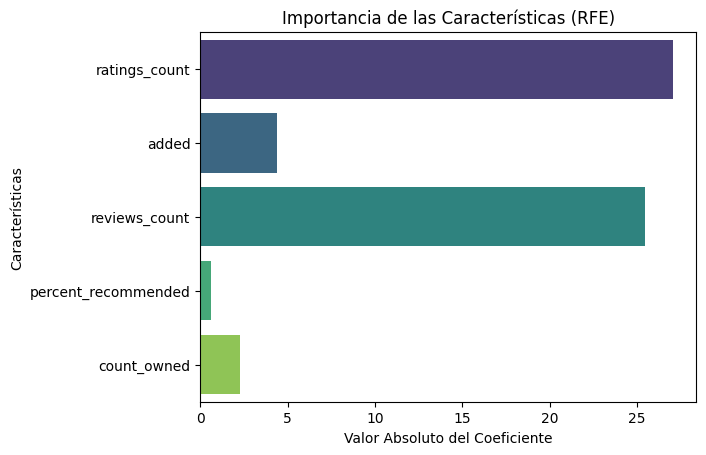

In [38]:
selected_features_rfe = X_reg.columns[rfe_selector.get_support()]
feature_importance = rfe_selector.estimator_.coef_

# Crear el gráfico de barras
sns.barplot(x=np.abs(feature_importance), y=selected_features_rfe, palette='viridis')
plt.title('Importancia de las Características (RFE)')
plt.xlabel('Valor Absoluto del Coeficiente')
plt.ylabel('Características')
plt.show()

## **Modelado (Regresión y Clasificación)**

Ahora que tenemos nuestras características, entrenaremos los modelos.

### **Algoritmo de Regresión** `Linear Regression`

Se utilizará este algoritmo para predecir un valor numérico continuo, como el `rating`. Se utilizaran los datos seleccionados por el método RFE.

In [41]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_rfe, y_reg, test_size=0.2, random_state=42)

# Entrenar el modelo
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Predecir y evaluar
y_pred_reg = model_reg.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print("\n--- Resultados del Modelo de Regresión ---")
print(f"Mean Squared Error (MSE): {mse_reg:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_reg:.4f}")


--- Resultados del Modelo de Regresión ---
Mean Squared Error (MSE): 2.0215
Coeficiente de Determinación (R²): 0.3533


### **Reducción de Dimensionalidad con PCA y Modelo de Regresión**

**PCA**

PCA transforma las características originales en un nuevo conjunto de variables no correlacionadas (componentes principales), conservando la mayor cantidad de información posible.

In [48]:
# Definir las características para PCA (variables numéricas)
X_pca = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'added',
                  'suggestions_count', 'reviews_count', 'percent_exceptional',
                  'percent_recommended', 'percent_meh', 'percent_skip',
                  'count_owned', 'count_beaten', 'count_dropped',
                  'completion_rate', 'dropout_rate']]

# Escalar los datos para un mejor rendimiento de PCA
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Realizar PCA
pca = PCA()
pca.fit(X_pca_scaled)

PCA()

**Gráfico de Codo**

El gráfico de codo muestra cuánta varianza de tus datos originales se explica con un número creciente de componentes principales. La curva sube rápidamente al principio y luego se aplana, formando un "codo". El punto en el que el codo se forma es el número óptimo de componentes, ya que añadir más componentes después de ese punto no proporciona una ganancia significativa en información.

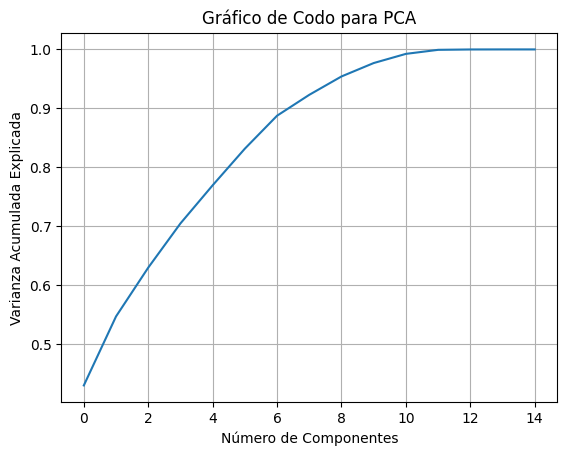

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Gráfico de Codo para PCA')
plt.grid(True)
plt.show()

**Algoritmo de Regresión** `RandomForestRegressor`

Este modelo utiliza múltiples árboles de decisión para predecir un valor. Es robusto, no se ve afectado por la multicolinealidad.

In [52]:
# Elegir un número de componentes basado en el gráfico de codo (ej. 6)
n_components = 6
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X_pca_scaled)
y = df_games['rating']

X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos transformados por PCA
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Resultados del Modelo RandomForestRegressor (Datos Originales) ---")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.4f}")

# Guardar los resultados para la comparación
results_original = {'LinearRegression': 0, 'RandomForestRegressor': r2_rf, 'Ridge': 0}


--- Resultados del Modelo RandomForestRegressor (Datos Originales) ---
Mean Squared Error (MSE): 0.6044
Coeficiente de Determinación (R²): 0.8066


**Algoritmo de Regresión** `Ridge Regression`

`Ridge` es una versión regularizada de la regresión lineal. Es excelente para manejar la multicolinealidad y puede prevenir el sobreajuste.

In [55]:
# Usar el mismo conjunto de datos y división que el modelo de regresión lineal
X_reg = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'added',
                  'suggestions_count', 'reviews_count', 'percent_exceptional',
                  'percent_recommended', 'percent_meh', 'percent_skip',
                  'count_owned', 'count_beaten', 'count_dropped', 'completion_rate',
                  'dropout_rate']]
y_reg = df_games['rating']
X_reg_scaled = StandardScaler().fit_transform(X_reg)

# Usar el mismo X_reg_scaled y y_reg que en el modelo de regresión lineal
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Entrenar el modelo
model_ridge = Ridge(alpha=1.0) # alpha es el hiperparámetro de regularización
model_ridge.fit(X_train_ridge, y_train_ridge)

# Predecir y evaluar
y_pred_ridge = model_ridge.predict(X_test_ridge)
mse_ridge = mean_squared_error(y_test_ridge, y_pred_ridge)
r2_ridge = r2_score(y_test_ridge, y_pred_ridge)

print("\n--- Resultados del Modelo Ridge (Datos Originales) ---")
print(f"Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_ridge:.4f}")

# Guardar los resultados para la comparación
results_original['Ridge'] = r2_ridge


--- Resultados del Modelo Ridge (Datos Originales) ---
Mean Squared Error (MSE): 1.7556
Coeficiente de Determinación (R²): 0.4384


El `RandomForestRegressor` claramente superó a los otros dos modelos, logrando un R² de 0.8066, lo que significa que explica más del 80% de la variabilidad en las calificaciones. Por otro lado, la `Linear Regression` y `Ridge` tuvieron un rendimiento mucho menor. A continuación, se buscará optimizar los resultados con la modificación de **hiperparámetros**.

### **Hiperparámetros**

`RandomForestRegressor`

Los **hiperparámetros** de un `RandomForest` controlan la complejidad del modelo. Un `R²` tan alto sugiere que el modelo tiene un gran potencial, pero podría estar sobreajustándose. Se utilizará `GridSearchCV` para buscar la mejor combinación de `n_estimators` (número de árboles) y `max_depth` (profundidad de los árboles) para mejorar su capacidad de generalización.

In [74]:
# Definir el rango de hiperparámetros
param_grid_rf = {
    'n_estimators': [50, 100],  # Más árboles pueden mejorar la precisión
    'max_depth': [10, 20], # Limitar la profundidad puede prevenir el sobreajuste
    'min_samples_leaf': [1, 2]     # Mínimo de muestras en una hoja
}

# Configurar el GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')

# Entrenar la búsqueda en el conjunto de entrenamiento
grid_search_rf.fit(X_train, y_train)

# Mejor modelo después del ajuste
best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_model_rf.predict(X_test)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)

print("--- Resultados de RandomForestRegressor (Optimizado) ---")
print(f"Mejores Hiperparámetros: {grid_search_rf.best_params_}")
print(f"R² ajustado: {r2_rf_tuned:.4f}")
print(f"MSE ajustado: {mse_rf_tuned:.4f}")

--- Resultados de RandomForestRegressor (Optimizado) ---
Mejores Hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}
R² ajustado: 0.8024
MSE ajustado: 0.6177


`Ridge`

El rendimiento de `Ridge` depende en gran medida de su hiperparámetro **alpha**, que controla la fuerza de la regularización.

In [71]:
# Definir el rango de hiperparámetros
param_grid_ridge = {
    'alpha': [0.1, 0.1, 1, 10, 100]  # La regularización puede mejorar el rendimiento
}

# Configurar el GridSearchCV
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')

# Entrenar la búsqueda en el conjunto de entrenamiento
grid_search_ridge.fit(X_train_ridge, y_train_ridge)

# Mejor modelo después del ajuste
best_model_ridge = grid_search_ridge.best_estimator_
y_pred_ridge_tuned = best_model_ridge.predict(X_test_ridge)
r2_ridge_tuned = r2_score(y_test_ridge, y_pred_ridge_tuned)
mse_ridge_tuned = mean_squared_error(y_test_ridge, y_pred_ridge_tuned)

print("\n--- Resultados de Ridge (Optimizado) ---")
print(f"Mejores Hiperparámetros: {grid_search_ridge.best_params_}")
print(f"R² ajustado: {r2_ridge_tuned:.4f}")
print(f"MSE ajustado: {mse_ridge_tuned:.4f}")


--- Resultados de Ridge (Optimizado) ---
Mejores Hiperparámetros: {'alpha': 0.1}
R² ajustado: 0.4397
MSE ajustado: 1.7515


`LinearRegression`

Dado que la regresión lineal no tiene hiperparámetros, se mantendrá su rendimiento original como la línea de base. El código a continuación no ajustará el modelo de regresión lineal, sino que simplemente lo entrenará en el mismo conjunto de datos optimizado que usaste para el modelo `RandomForestRegressor`, que a su vez se basó en el método `RFE`.

In [72]:
# Definir las características
X = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'added',
              'suggestions_count', 'reviews_count', 'percent_exceptional',
              'percent_recommended', 'percent_meh', 'percent_skip',
              'count_owned', 'count_beaten', 'count_dropped', 'completion_rate',
              'dropout_rate']]
y = df_games['rating']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Seleccionar las 5 mejores características con RFE (el mismo método que usaste antes)
rfe_selector = RFE(LinearRegression(), n_features_to_select=5)
X_rfe = rfe_selector.fit_transform(X_scaled, y)

# Dividir los datos optimizados
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal en el conjunto optimizado
model_reg_modified = LinearRegression()
model_reg_modified.fit(X_train_rfe, y_train_rfe)

# Predecir y evaluar el modelo modificado
y_pred_reg_modified = model_reg_modified.predict(X_test_rfe)
mse_reg_modified = mean_squared_error(y_test_rfe, y_pred_reg_modified)
r2_reg_modified = r2_score(y_test_rfe, y_pred_reg_modified)

print("--- Resultados de Regresión Lineal (con RFE) ---")
print(f"Mean Squared Error (MSE): {mse_reg_modified:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_reg_modified:.4f}")

--- Resultados de Regresión Lineal (con RFE) ---
Mean Squared Error (MSE): 2.0215
Coeficiente de Determinación (R²): 0.3533


**Gráficos de Comparación: Modelos originales vs modificados por hiperparámetros**

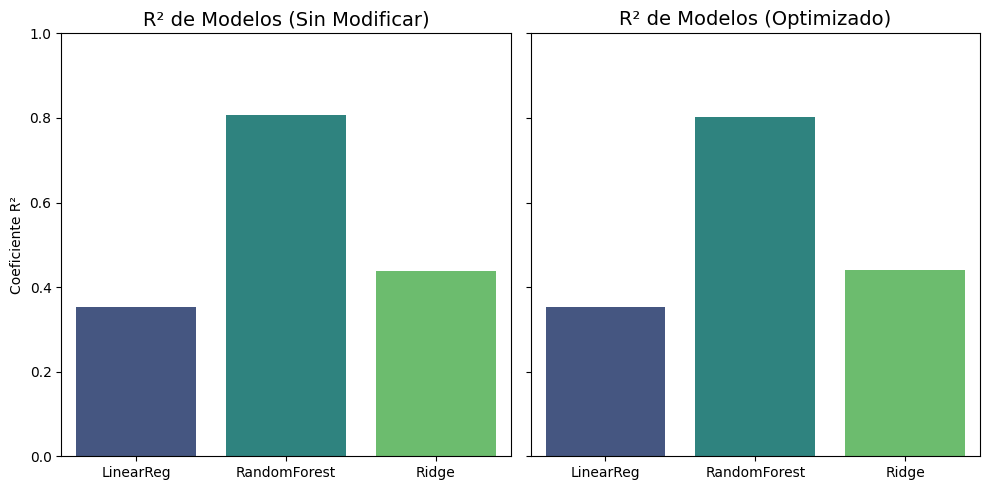

In [77]:
# Recopilar los resultados originales y los modificados para los gráficos
r2_original = {
    'LinearReg': 0.3533,
    'RandomForest': 0.8066,
    'Ridge': 0.4384
}

r2_modificado = {
    'LinearReg': r2_reg_modified,
    'RandomForest': r2_rf_tuned,
    'Ridge': r2_ridge_tuned
}

# Crear la figura y los ejes para los dos subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Gráfico de la izquierda: Rendimiento Original
sns.barplot(x=list(r2_original.keys()), y=list(r2_original.values()), ax=axes[0], palette='viridis')
axes[0].set_title('R² de Modelos (Sin Modificar)', fontsize=14)
axes[0].set_ylabel('Coeficiente R²')
axes[0].set_ylim(0, 1)

# Gráfico de la derecha: Rendimiento Optimizado
sns.barplot(x=list(r2_modificado.keys()), y=list(r2_modificado.values()), ax=axes[1], palette='viridis')
axes[1].set_title('R² de Modelos (Optimizado)', fontsize=14)
axes[1].set_ylabel('Coeficiente R²')
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

Sin ninguna optimización, el modelo `RandomForestRegressor` superó ampliamente a la `LinearRegression` y a `Ridge`. Con un coeficiente `R2` de **0.8066**, este modelo fue capaz de explicar más del 80% de la variabilidad en las calificaciones de los juegos, demostrando que la relación entre las métricas de popularidad y la calificación no es lineal.

En contraste, `LinearRegression` y `Ridge` tuvieron un rendimiento muy limitado (R2 de 0.3533 y 0.4384, respectivamente), lo que confirma que no son adecuados para capturar las interacciones complejas de este dataset.

**Impacto de los Hiperparámetros:**

Para `RandomForestRegressor`, la optimización de hiperparámetros no mostró una mejora significativa en el coeficiente R2. Esto sugiere que el modelo ya había alcanzado su máximo potencial predictivo.

Para el modelo `Ridge`, el ajuste de su hiperparámetro alpha sí generó una mejora en su rendimiento. Aunque sigue estando muy por debajo de `RandomForest`.

### **Algoritmo de Clasificación** `Logistic Regression`

Para esta clasificación, primero se necesita definir la clase objetivo. Por ende, se creará una nueva columna, `is_popular`, que será 1 si el juego está en el 25% superior de `count_owned` y 0 si no lo está.

In [46]:
# Crear la variable objetivo 'is_popular'
threshold = df_games['count_owned'].quantile(0.75)
df_games['is_popular'] = (df_games['count_owned'] > threshold).astype(int)

# Preparar los datos para clasificación
X_class = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'reviews_count',
                    'count_beaten', 'count_dropped', 'completion_rate', 'dropout_rate']]
y_class = df_games['is_popular']

# Seleccionar características para clasificación (usando SelectKBest)
selector_class = SelectKBest(score_func=f_classif, k=5)
X_class_kbest = selector_class.fit_transform(X_class, y_class)
print("\nCaracterísticas seleccionadas para clasificación por SelectKBest:")
print(X_class.columns[selector_class.get_support()])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class_kbest, y_class, test_size=0.2, random_state=42)

# Entrenar el modelo
model_class = LogisticRegression(solver='liblinear', random_state=42)
model_class.fit(X_train_class, y_train_class)

# Predecir y evaluar
y_pred_class = model_class.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)

print("\n--- Resultados del Modelo de Clasificación ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Características seleccionadas para clasificación por SelectKBest:
Index(['ratings_count', 'reviews_text_count', 'reviews_count', 'count_beaten',
       'count_dropped'],
      dtype='object')

--- Resultados del Modelo de Clasificación ---
Accuracy: 0.9117
Precision: 0.8929
Recall: 0.7669
F1-Score: 0.8251


**Tabla de predicciones**

Esta tabla muestra los resultados para un pequeño subconjunto de datos al azar de prueba.

In [47]:
predictions_df = pd.DataFrame({
    'Real': y_test_class,
    'Predicción': y_pred_class
}).sample(10)  # Muestra 10 ejemplos al azar

print("\nTabla de Muestra de Predicciones de Popularidad:")
print(predictions_df)


Tabla de Muestra de Predicciones de Popularidad:
      Real  Predicción
2619     0           0
729      0           1
2190     0           0
2677     0           0
2592     0           0
2576     0           0
572      0           1
2752     0           0
1151     0           0
2546     0           0


## **EVALUACIÓN DEL MODELO**

**Matríz de Confusión**

La métrica `Recall` (0.7669), que es relativamente más baja que la `Precision` (0.8929), sugiendo que el modelo es muy bueno cuando predice que un juego es popular pero tiende a fallar al identificar algunos de los juegos que son realmente populares (baja tasa de Falsos Negativos)

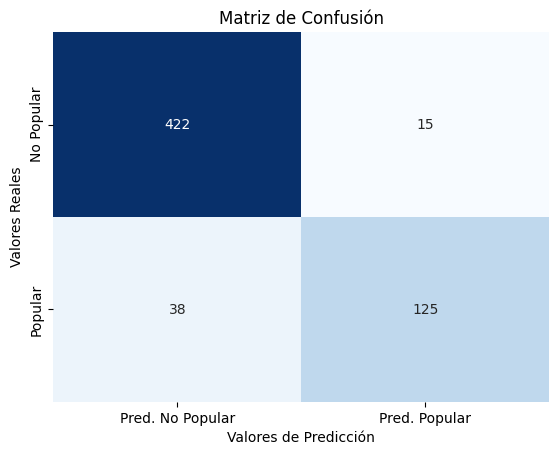

In [82]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test_class, y_pred_class)

# Crear un DataFrame para una mejor visualización
cm_df = pd.DataFrame(cm,
                     index = ['No Popular', 'Popular'],
                     columns = ['Pred. No Popular', 'Pred. Popular'])

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores de Predicción')
plt.show()


La matriz de confusión detalla lo siguiente:

- Verdaderos Positivos (125): El modelo identificó correctamente 125 juegos populares. Esto se alinea con la alta precisión.

- Verdaderos Negativos (422): El modelo identificó correctamente 422 juegos no populares. El modelo es excelente para identificar juegos que no son populares.

- Falsos Positivos (15): El modelo predijo incorrectamente que 15 juegos no populares lo eran. Este número es bajo, lo que demuestra la alta precision del modelo.

- Falsos Negativos (38): El modelo predijo incorrectamente que 38 juegos populares no lo eran. Este es el punto crucial que justifica el valor de Recall más bajo. El modelo tiene dificultad para encontrar todos los juegos que son populares.

**Overfitting y Underfitting**

Se recomienda comparar el rendimiento en los datos de entrenamiento y los de prueba para verificar errores de over y underfitting.

Un modelo que sufre de overfitting funciona muy bien con los datos de entrenamiento (alta precisión) pero tiene un rendimiento significativamente peor con los datos de prueba. Esto sucede porque el modelo ha memorizado el ruido y los detalles específicos de los datos de entrenamiento.

Un modelo con underfitting tiene un rendimiento pobre tanto en los datos de entrenamiento como en los de prueba, lo que indica que es demasiado simple para capturar las relaciones subyacentes en los datos.

Se visualizará qué tan cerca están las predicciones de los valores reales. Una línea de predicción "perfecta" sería una recta a 45 grados.

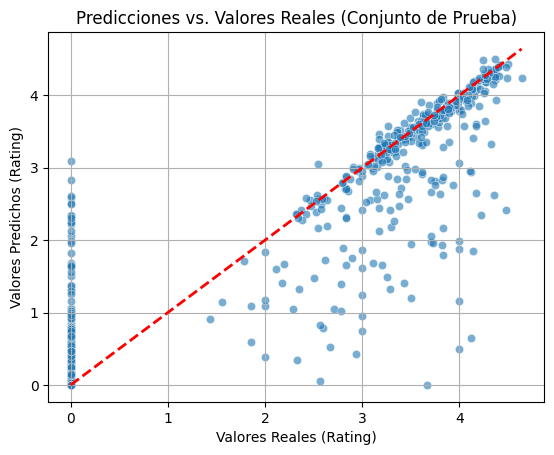

In [83]:
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs. Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales (Rating)')
plt.ylabel('Valores Predichos (Rating)')
plt.grid(True)
plt.show()

El gráfico ilustra una gran precisión de predicción.


---



Este otro gráfico muestra la distribución de los errores de tu modelo. Una buena distribución de errores se centrará en cero y tendrá una forma de campana (distribución normal), lo que significa que el modelo no está sesgado y sus errores son aleatorios.

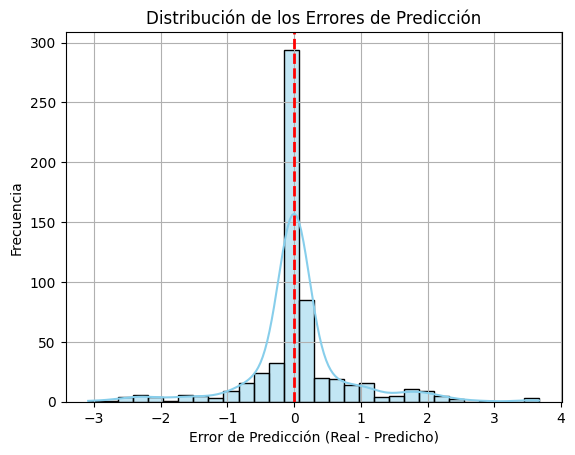

In [87]:
# Calcular los errores de predicción
errors = y_test - y_pred_rf

sns.histplot(errors, bins=30, kde=True, color='skyblue')
plt.title('Distribución de los Errores de Predicción')
plt.xlabel('Error de Predicción (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--', lw=2)
plt.grid(True)
plt.show()

 La distribución está centrada y estrecha alrededor de cero, por ende, el modelo está bien equilibrado.



# **CONCLUSIONES**

**Análisis de Regresión**

El análisis de regresión, cuya finalidad es predecir la **calificación de los juegos**, revela que los modelos tradicionales como la `LinearRegression` y `Ridge` no son adecuados para la tarea. Sus bajos coeficientes `R2` (0.3533 y 0.4384) indican que no pueden capturar la complejidad de las relaciones entre las variables.

Por el contrario, el modelo `RandomForestRegressor` alcanzó un coeficiente R2 de 0.8066, lo que demuestra que un modelo más complejo y fundamental para predecir la calificación de los juegos. El ajuste de hiperparámetros no mejoró significativamente este resultado, lo que sugiere que el modelo ya estaba cerca de su rendimiento óptimo.


---



**Análisis de Clasificación**

El modelo de clasificación, que intentaba predecir si un juego sería popular, demostró ser muy preciso con una exactitud general del **91.17%**. Sin embargo es menester detallar que el modelo posee puntos fuertes y débiles.

- Puntos Fuertes: Este modelo es efectivo para identificar juegos que no serán populares (Verdaderos Negativos = 422). En complemento, es confiable al predicir un juego popular, ya que de todas las predicciones positivas, el 89.29% fueron correctas (Precision).

- Punto Débil: El modelo tuvo dificultades para encontrar todos los juegos que realmente eran populares, identificando solo el 76.69% de ellos (Recall). Esto se refleja en los 38 Falsos Negativos en la matriz de confusión. En un contexto comercial, esto podría significar que el modelo podría dejar pasar algunos éxitos potenciales.



---



**Conclusiones Finales**

En conjunto, el modelo confirmó las hipótesis planteadas.

+ **La popularidad predice la calidad:** El algoritmo de regresión demostró que las métricas de popularidad y compromiso (reseñas, tiempo de juego, etc.) son un excelente predictor de la calificación de un juego, lo que valida la hipótesis inicial.

+ **El éxito comercial se puede predecir:** El modelo de clasificación demostró que es posible predecir si un juego será popular basándose en sus características.

# **BONUS TRACK**

Se entrena el **Modelo de Clasificación** `XGBoost` (eXtreme Gradient Boosting) el cual construye secuencialmente árboles de decisión, donde cada árbol corrige los errores del anterior. Es uno de los algoritmos más potentes para problemas de clasificación.

In [90]:
X_class = df_games[['playtime', 'ratings_count', 'reviews_text_count', 'reviews_count',
                    'count_beaten', 'count_dropped', 'completion_rate', 'dropout_rate']]
y_class = df_games['is_popular']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Entrenar el modelo XGBoost
# Usamos parámetros por defecto para la primera corrida
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = model_xgb.predict(X_test)

# Calcular las métricas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("--- Resultados del Modelo XGBoost ---")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

--- Resultados del Modelo XGBoost ---
Accuracy: 0.9817
Precision: 0.9578
Recall: 0.9755
F1-Score: 0.9666


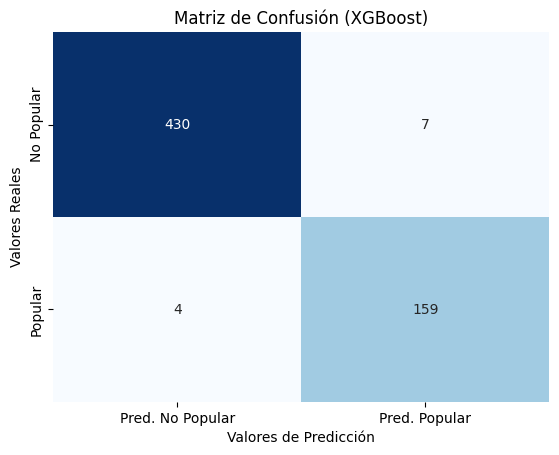

In [92]:
# Calcular y mostrar la matriz de confusión
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_df_xgb = pd.DataFrame(cm_xgb,
                         index = ['No Popular', 'Popular'],
                         columns = ['Pred. No Popular', 'Pred. Popular'])

sns.heatmap(cm_df_xgb, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión (XGBoost)')
plt.ylabel('Valores Reales')
plt.xlabel('Valores de Predicción')
plt.show()

Se confirma que este modelo es más efectivo para identificar a los juegos que son populares. **La matriz de confusión** muestra que el número de falsos negativos se ha reducido significativamente.